In [5]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
app_df = pd.read_csv("Resources/charity_data.csv")
app_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [6]:
# Preprocess the dataset 
app_df= application_df.drop(columns=["EIN","NAME"])
app_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [7]:
app_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [8]:
app_col=app_df["APPLICATION_TYPE"].value_counts()
app_col

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

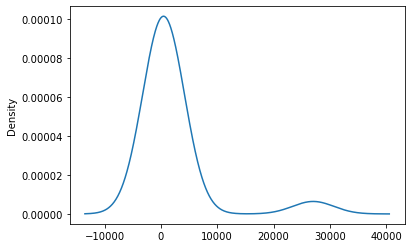

In [13]:
app_df["APPLICATION_TYPE"].value_counts().plot.density()

In [14]:
# Replace Bins into dataframe- APPLICATION
replace_app= app_col[app_col < 800].index.tolist()

for app in replace_app:
    application_df.APPLICATION_TYPE= app_df.APPLICATION_TYPE.replace(app,"Other")
    
app_df.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [15]:
# Check CLASSIFICATION Column
classification_col= application_df["CLASSIFICATION"].value_counts()
classification_col.head(50)

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [16]:
# Replace Bins into dataframe- CLASSIFICATION
replace_class= classification_col[classification_col<800].index.tolist()

for clase in replace_class:
    app_df.CLASSIFICATION=app_df.CLASSIFICATION.replace(clase, "Other")
    
app_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [18]:
# Generate our categorical variable lists 
app_cgl=app_df.dtypes[application_df.dtypes=="object"].index.tolist()
app_df[app_cgl].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [20]:
# Create a OneHotEncoder instance 
enc= OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder unsing categorical list 
encode_df= pd.DataFrame(enc.fit_transform(app_df[app_cgl]))

# Add the encoded variable names to the dataframe 
encode_df.columns= enc.get_feature_names(app_cgl)
encode_df.head()

C:\Users\HWigh\.conda\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
# Merge One-Hot encoded features and drop the originals
prep_app_df= app_df.merge(encode_df,left_index=True, right_index=True).drop(columns= app_cgl)
prep_app_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


First Attempt

In [22]:
print(len(prep_app_df.columns))

117


In [23]:
prep_app_df.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_T10',
       'APPLICATION_TYPE_T12', 'APPLICATION_TYPE_T13', 'APPLICATION_TYPE_T14',
       'APPLICATION_TYPE_T15', 'APPLICATION_TYPE_T17', 'APPLICATION_TYPE_T19',
       ...
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M',
       'SPECIAL_CONSIDERATIONS_N', 'SPECIAL_CONSIDERATIONS_Y'],
      dtype='object', length=117)

In [24]:
temp_app_df= prep_app_df.drop(columns= ["USE_CASE_Other","AFFILIATION_Other"])
temp_app_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
y=temp_app_df["IS_SUCCESSFUL"].values
X=temp_app_df.drop(columns=["IS_SUCCESSFUL"]).values

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.2, random_state= 3)

In [27]:
# Create StandArdScaler 
scaler= StandardScaler()

# Fit the StandardScaler
X_scaler= scaler.fit(X_train)

# Scale the data 
X_train_scaled= X_scaler.transform(X_train)
X_test_scaled= X_scaler.transform(X_test)

In [28]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input = len(X_train[0])
hidden_nodes1 = 80
hidden_nodes2 = 30
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes1, input_dim = num_input,
                                    activation ="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_nodes1, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units = 1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                9200      
                                                                 
 dense_1 (Dense)             (None, 80)                6480      
                                                                 
 dense_2 (Dense)             (None, 1)                 81        
                                                                 
Total params: 15,761
Trainable params: 15,761
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Compile the model 
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

# Create callback that saves every 5 epochs
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Create a Callback that saves the weights every 5 epochs
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
cp_callback= ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, save_freq=5)

# Train the model
fit_model= nn.fit(X_train_scaled, y_train, epochs=200, verbose=1, callbacks=[cp_callback])

#Evaluate results
model_loss, model_accuracy= nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss:{model_loss}, Accuracy: {model_accuracy}")

Epoch 1/200
858/858 [==============================] - 5s 6ms/step - loss: 0.5762 - accuracy: 0.7187
Epoch 2/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5530 - accuracy: 0.7301
Epoch 3/200
858/858 [==============================] - 3s 3ms/step - loss: 0.5498 - accuracy: 0.7314
Epoch 4/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5469 - accuracy: 0.7331
Epoch 5/200
858/858 [==============================] - 3s 3ms/step - loss: 0.5457 - accuracy: 0.7344
Epoch 6/200
858/858 [==============================] - 3s 3ms/step - loss: 0.5450 - accuracy: 0.7344
Epoch 7/200
858/858 [==============================] - 3s 3ms/step - loss: 0.5441 - accuracy: 0.7348
Epoch 8/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5430 - accuracy: 0.7358
Epoch 9/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5428 - accuracy: 0.7352
Epoch 10/200
858/858 [==============================] - 2s 3ms/step - loss: 0.5418 - accura

858/858 [==============================] - 5s 6ms/step - loss: 0.5291 - accuracy: 0.7411
Epoch 82/200
858/858 [==============================] - 6s 7ms/step - loss: 0.5294 - accuracy: 0.7413
Epoch 83/200
858/858 [==============================] - 5s 6ms/step - loss: 0.5292 - accuracy: 0.7424
Epoch 84/200
858/858 [==============================] - 5s 6ms/step - loss: 0.5293 - accuracy: 0.7420
Epoch 85/200
858/858 [==============================] - 6s 6ms/step - loss: 0.5290 - accuracy: 0.7426
Epoch 86/200
858/858 [==============================] - 6s 7ms/step - loss: 0.5289 - accuracy: 0.7422
Epoch 87/200
858/858 [==============================] - 6s 7ms/step - loss: 0.5287 - accuracy: 0.7424
Epoch 88/200
858/858 [==============================] - 6s 7ms/step - loss: 0.5288 - accuracy: 0.7435
Epoch 89/200
858/858 [==============================] - 6s 7ms/step - loss: 0.5289 - accuracy: 0.7426
Epoch 90/200
858/858 [==============================] - 6s 8ms/step - loss: 0.5286 - accuracy: 

858/858 [==============================] - 11s 13ms/step - loss: 0.5267 - accuracy: 0.7428
Epoch 161/200
858/858 [==============================] - 10s 12ms/step - loss: 0.5268 - accuracy: 0.7442
Epoch 162/200
858/858 [==============================] - 11s 13ms/step - loss: 0.5271 - accuracy: 0.7431
Epoch 163/200
858/858 [==============================] - 11s 13ms/step - loss: 0.5288 - accuracy: 0.7428
Epoch 164/200
858/858 [==============================] - 11s 13ms/step - loss: 0.5267 - accuracy: 0.7433
Epoch 165/200
858/858 [==============================] - 11s 12ms/step - loss: 0.5264 - accuracy: 0.7430
Epoch 166/200
858/858 [==============================] - 11s 13ms/step - loss: 0.5263 - accuracy: 0.7431
Epoch 167/200
858/858 [==============================] - 11s 13ms/step - loss: 0.5262 - accuracy: 0.7427
Epoch 168/200
858/858 [==============================] - 11s 12ms/step - loss: 0.5261 - accuracy: 0.7424
Epoch 169/200
858/858 [==============================] - 11s 13ms/ste

Second Attempt

In [30]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input = len(X_train[0])
hidden_nodes1 = 80
hidden_nodes2 = 30
hidden_node3= 15

nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes1, input_dim = num_input,
                                    activation ="relu"))
# Second hidden layer
nn2.add(tf.keras.layers.Dense(units = hidden_nodes1, activation="relu"))

# Third Hidden Layer
nn2.add(tf.keras.layers.Dense(units= hidden_node3, activation="relu"))

# Output layer
nn2.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

# Check the structure of the model
nn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                9200      
                                                                 
 dense_4 (Dense)             (None, 80)                6480      
                                                                 
 dense_5 (Dense)             (None, 15)                1215      
                                                                 
 dense_6 (Dense)             (None, 1)                 16        
                                                                 
Total params: 16,911
Trainable params: 16,911
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Compile the model 
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

# Create a Callback that saves the weights every 5 epochs
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
cp_callback= ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, save_freq=5)

# Train the model
fit_model= nn2.fit(X_train_scaled, y_train, epochs=200, verbose=1, callbacks=[cp_callback])

# Evaluate Results
model_loss, model_accuracy= nn2.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss:{model_loss}, Accuracy: {model_accuracy}")

Epoch 1/200
858/858 [==============================] - 7s 8ms/step - loss: 0.5723 - accuracy: 0.7228
Epoch 2/200
858/858 [==============================] - 5s 5ms/step - loss: 0.5526 - accuracy: 0.7311
Epoch 3/200
858/858 [==============================] - 4s 4ms/step - loss: 0.5492 - accuracy: 0.7318
Epoch 4/200
858/858 [==============================] - 7s 8ms/step - loss: 0.5469 - accuracy: 0.7340
Epoch 5/200
858/858 [==============================] - 4s 5ms/step - loss: 0.5453 - accuracy: 0.7342
Epoch 6/200
858/858 [==============================] - 7s 8ms/step - loss: 0.5450 - accuracy: 0.7328
Epoch 7/200
858/858 [==============================] - 6s 7ms/step - loss: 0.5437 - accuracy: 0.7345
Epoch 8/200
858/858 [==============================] - 5s 6ms/step - loss: 0.5432 - accuracy: 0.7344
Epoch 9/200
858/858 [==============================] - 5s 6ms/step - loss: 0.5423 - accuracy: 0.7356
Epoch 10/200
858/858 [==============================] - 6s 7ms/step - loss: 0.5416 - accura

858/858 [==============================] - 8s 10ms/step - loss: 0.5288 - accuracy: 0.7427
Epoch 82/200
858/858 [==============================] - 9s 10ms/step - loss: 0.5285 - accuracy: 0.7426
Epoch 83/200
858/858 [==============================] - 9s 10ms/step - loss: 0.5280 - accuracy: 0.7430
Epoch 84/200
858/858 [==============================] - 8s 10ms/step - loss: 0.5281 - accuracy: 0.7430
Epoch 85/200
858/858 [==============================] - 8s 10ms/step - loss: 0.5285 - accuracy: 0.7426
Epoch 86/200
858/858 [==============================] - 8s 10ms/step - loss: 0.5281 - accuracy: 0.7426
Epoch 87/200
858/858 [==============================] - 8s 10ms/step - loss: 0.5284 - accuracy: 0.7430
Epoch 88/200
858/858 [==============================] - 9s 10ms/step - loss: 0.5286 - accuracy: 0.7426
Epoch 89/200
858/858 [==============================] - 8s 9ms/step - loss: 0.5281 - accuracy: 0.7431
Epoch 90/200
858/858 [==============================] - 8s 9ms/step - loss: 0.5279 - ac

858/858 [==============================] - 9s 10ms/step - loss: 0.5256 - accuracy: 0.7432
Epoch 161/200
858/858 [==============================] - 8s 10ms/step - loss: 0.5259 - accuracy: 0.7443
Epoch 162/200
858/858 [==============================] - 8s 9ms/step - loss: 0.5254 - accuracy: 0.7434
Epoch 163/200
858/858 [==============================] - 9s 10ms/step - loss: 0.5254 - accuracy: 0.7442
Epoch 164/200
858/858 [==============================] - 8s 9ms/step - loss: 0.5268 - accuracy: 0.7439
Epoch 165/200
858/858 [==============================] - 9s 10ms/step - loss: 0.5255 - accuracy: 0.7439
Epoch 166/200
858/858 [==============================] - 8s 9ms/step - loss: 0.5252 - accuracy: 0.7444
Epoch 167/200
858/858 [==============================] - 9s 10ms/step - loss: 0.5253 - accuracy: 0.7442
Epoch 168/200
858/858 [==============================] - 8s 10ms/step - loss: 0.5256 - accuracy: 0.7434
Epoch 169/200
858/858 [==============================] - 9s 10ms/step - loss: 0.5

Third Attempt

In [33]:
y=prep_app_df["IS_SUCCESSFUL"].values
X=prep_app_df.drop(columns=["IS_SUCCESSFUL"]).values

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.2, random_state= 3)

In [34]:
# Create StandArdScaler 
scaler= StandardScaler()

# Fit the StandardScaler
X_scaler= scaler.fit(X_train)

# Scale the data 
X_train_scaled= X_scaler.transform(X_train)
X_test_scaled= X_scaler.transform(X_test)

In [35]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input = len(X_train[0])
hidden_nodes1 = 80
hidden_nodes2 = 35
hidden_node3=10

nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes1, input_dim = num_input,
                                    activation ="relu"))
# Second hidden layer
nn3.add(tf.keras.layers.Dense(units = hidden_nodes1, activation="relu"))

# Third Hidden Layer
nn3.add(tf.keras.layers.Dense(units= hidden_node3, activation="relu"))

# Output layer
nn3.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

# Check the structure of the model
nn3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 80)                9360      
                                                                 
 dense_8 (Dense)             (None, 80)                6480      
                                                                 
 dense_9 (Dense)             (None, 10)                810       
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 16,661
Trainable params: 16,661
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Compile the model 
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

# Create a Callback that saves the weights every 5 epochs
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
cp_callback= ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, save_freq=5)

# Train the model
fit_model= nn3.fit(X_train_scaled, y_train, epochs=200, verbose=1, callbacks=[cp_callback])

# Evaluate Results
model_loss, model_accuracy= nn3.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss:{model_loss}, Accuracy: {model_accuracy}")

Epoch 1/200
858/858 [==============================] - 10s 12ms/step - loss: 0.5701 - accuracy: 0.7195
Epoch 2/200
858/858 [==============================] - 7s 9ms/step - loss: 0.5518 - accuracy: 0.7312
Epoch 3/200
858/858 [==============================] - 7s 8ms/step - loss: 0.5486 - accuracy: 0.7323
Epoch 4/200
858/858 [==============================] - 10s 11ms/step - loss: 0.5469 - accuracy: 0.7336
Epoch 5/200
858/858 [==============================] - 10s 11ms/step - loss: 0.5452 - accuracy: 0.7352
Epoch 6/200
858/858 [==============================] - 10s 11ms/step - loss: 0.5450 - accuracy: 0.7346
Epoch 7/200
858/858 [==============================] - 9s 11ms/step - loss: 0.5433 - accuracy: 0.7350
Epoch 8/200
858/858 [==============================] - 10s 11ms/step - loss: 0.5424 - accuracy: 0.7354
Epoch 9/200
858/858 [==============================] - 9s 10ms/step - loss: 0.5417 - accuracy: 0.7359
Epoch 10/200
858/858 [==============================] - 9s 11ms/step - loss: 0.

858/858 [==============================] - 10s 11ms/step - loss: 0.5292 - accuracy: 0.7421
Epoch 81/200
858/858 [==============================] - 9s 10ms/step - loss: 0.5296 - accuracy: 0.7423
Epoch 82/200
858/858 [==============================] - 10s 11ms/step - loss: 0.5297 - accuracy: 0.7421
Epoch 83/200
858/858 [==============================] - 10s 11ms/step - loss: 0.5294 - accuracy: 0.7423
Epoch 84/200
858/858 [==============================] - 9s 11ms/step - loss: 0.5297 - accuracy: 0.7420
Epoch 85/200
858/858 [==============================] - 10s 11ms/step - loss: 0.5287 - accuracy: 0.7423
Epoch 86/200
858/858 [==============================] - 10s 11ms/step - loss: 0.5293 - accuracy: 0.7425
Epoch 87/200
858/858 [==============================] - 10s 11ms/step - loss: 0.5288 - accuracy: 0.7427
Epoch 88/200
858/858 [==============================] - 10s 11ms/step - loss: 0.5289 - accuracy: 0.7429
Epoch 89/200
858/858 [==============================] - 9s 11ms/step - loss: 0.

858/858 [==============================] - 10s 11ms/step - loss: 0.5270 - accuracy: 0.7429
Epoch 159/200
858/858 [==============================] - 9s 11ms/step - loss: 0.5259 - accuracy: 0.7436
Epoch 160/200
858/858 [==============================] - 10s 11ms/step - loss: 0.5260 - accuracy: 0.7431
Epoch 161/200
858/858 [==============================] - 10s 11ms/step - loss: 0.5261 - accuracy: 0.7437
Epoch 162/200
858/858 [==============================] - 9s 11ms/step - loss: 0.5262 - accuracy: 0.7429
Epoch 163/200
858/858 [==============================] - 10s 12ms/step - loss: 0.5261 - accuracy: 0.7431
Epoch 164/200
858/858 [==============================] - 9s 11ms/step - loss: 0.5256 - accuracy: 0.7432
Epoch 165/200
858/858 [==============================] - 9s 10ms/step - loss: 0.5260 - accuracy: 0.7432
Epoch 166/200
858/858 [==============================] - 10s 12ms/step - loss: 0.5255 - accuracy: 0.7435
Epoch 167/200
858/858 [==============================] - 10s 11ms/step - 